# Homework 2

In this homework, we are gonna perform some EDA work on our browser history!

Extract & prepare your history dataset using: 
https://github.com/msaricaumbc/DS601/blob/main/Week09/homework/preparation_BrowserHistory.ipynb

DO NOT commit your history dataset!

Watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI

In [158]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [79]:
df = pd.read_csv('history.csv')
df.shape

(971, 9)

In [80]:
df.head()

,order,id,date,time,title,url,visitCount,typedCount,transition
0,0,27299,4/14/2025,17:30:00,Chrome Web Store - Extensions,https://chromewebstore.google.com/category/ext...,1,0,link
1,1,27298,4/14/2025,17:28:16,Chrome 应用商店 - 主题,https://chromewebstore.google.com/category/themes,1,0,link
2,2,27297,4/14/2025,17:28:14,Chrome 应用商店,https://chromewebstore.google.com/,1,0,link
3,3,27296,4/14/2025,17:27:37,Export Chrome History - Chrome 应用商店,https://chromewebstore.google.com/detail/expor...,1,0,link
4,4,27294,4/14/2025,17:26:44,Chrome Web Store,https://chromewebstore.google.com/?hl=en,1,0,link


In [81]:
df.tail()

,order,id,date,time,title,url,visitCount,typedCount,transition
966,966,418,4/7/2025,20:11:24,Databricks - Sign In,https://community.cloud.databricks.com/,11,0,link
967,967,18805,4/7/2025,20:11:24,Databricks - Sign In,https://community.cloud.databricks.com/login.html,6,0,link
968,968,26549,4/7/2025,20:11:18,databricks community edition - Google 搜索,https://www.google.com/search?q=databricks+com...,1,0,generated
969,969,336,4/7/2025,19:21:17,ChatGPT,https://chatgpt.com/,66,10,link
970,970,337,4/7/2025,19:21:14,XML HTML Extraction Fix,https://chatgpt.com/c/66f21838-9518-8013-9d6e-...,46,5,auto_bookmark


In [82]:
df.isna().sum()

order         0
id            0
date          0
time          0
title         8
url           0
visitCount    0
typedCount    0
transition    0
dtype: int64

In [83]:
df.dropna( inplace=True)

In [84]:
df.dtypes

order          int64
id             int64
date          object
time          object
title         object
url           object
visitCount     int64
typedCount     int64
transition    object
dtype: object

In [107]:
# Time Feature Engineering
# Convert 'time' and 'date' columns with a specified format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')  # Adjust if the 'date' format is different
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')  # Adjust if the 'time' format is different

# Now you can extract the hour and day of the week
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

# Check the data types
print(df.dtypes)


order                  int64
id                     int64
date          datetime64[ns]
time          datetime64[ns]
title                 object
url                   object
visitCount             int64
typedCount             int64
transition            object
hour                   int32
dayofweek              int32
dtype: object


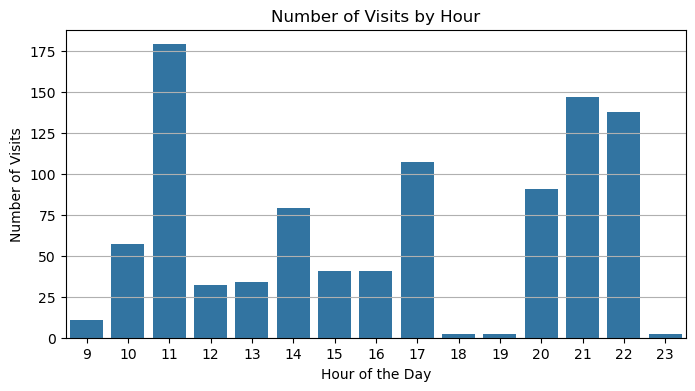

In [117]:

# Browsing Peak Hours
plt.figure(figsize=(8, 4))
sns.countplot(x='hour', data=df)  # Without specifying a palette
plt.title('Number of Visits by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.grid(axis='y')
plt.show()


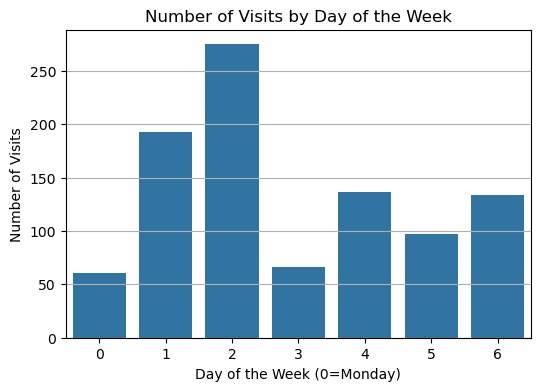

In [129]:
# Visits by Day of the Week
plt.figure(figsize=(6,4))
sns.countplot(x='dayofweek', data=df)
plt.title('Number of Visits by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Number of Visits')
plt.grid(axis='y')
plt.show()


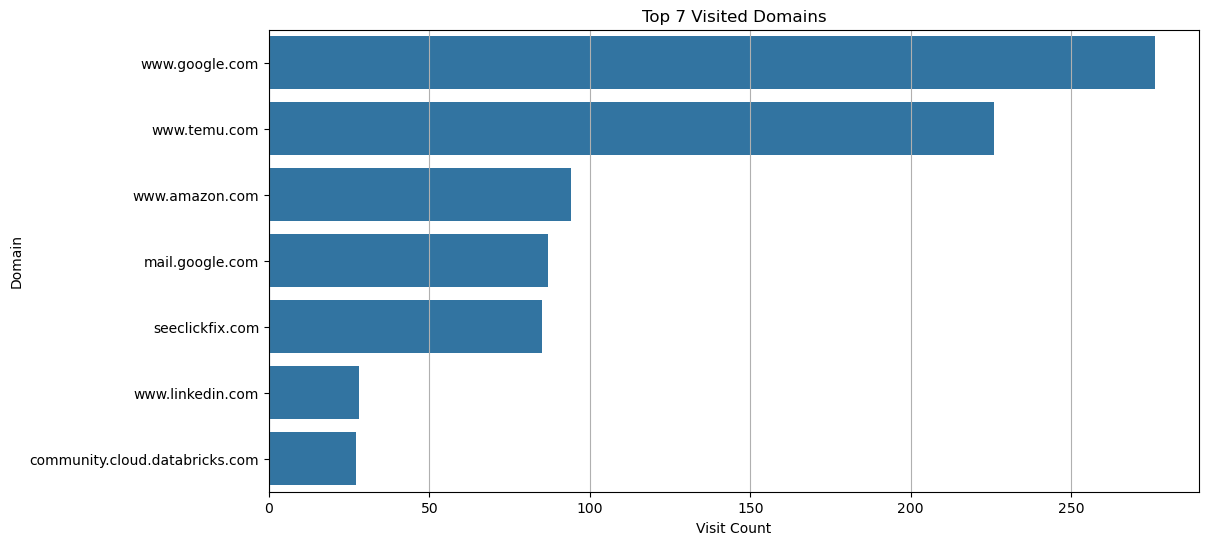

In [154]:
# Top Visited Domains
df['domain'] = df['url'].apply(lambda x: re.findall(r'https?://(.*?)/', x)[0] if pd.notnull(x) else '')

top_domains = df['domain'].value_counts().head(7)

plt.figure(figsize=(12,6))
sns.barplot(x=top_domains.values, y=top_domains.index)
plt.title('Top 7 Visited Domains')
plt.xlabel('Visit Count')
plt.ylabel('Domain')
plt.grid(axis='x')
plt.show()


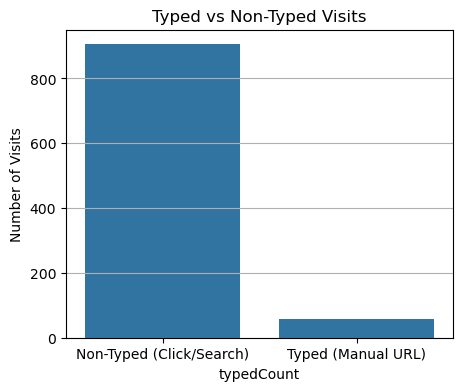

In [156]:
# Typed vs Non-Typed Visits
typed_summary = df['typedCount'].apply(lambda x: 1 if x > 0 else 0).value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=typed_summary.index, y=typed_summary.values)
plt.xticks([0,1], ['Non-Typed (Click/Search)', 'Typed (Manual URL)'])
plt.title('Typed vs Non-Typed Visits')
plt.ylabel('Number of Visits')
plt.grid(axis='y')
plt.show()

In [147]:
# Summary Printout
print("\n=== Quick Summary ===")
print(f"Most visited domain: {top_domains.index[0]}")
print(f"Peak browsing hour: {df['hour'].mode()[0]}")
print(f"Day with most visits: {df['dayofweek'].mode()[0]} (0=Monday)")


=== Quick Summary ===
Most visited domain: www.google.com
Peak browsing hour: 11
Day with most visits: 2 (0=Monday)


### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. Is this a work computer or personal computer?
It appears to be a combination of both. Because there are several visits to LinkedIn, suggesting a professional focus, possibly looking for job opportunities or related career interests. There is also browsing related to Temu and Amazon, which suggests personal shopping or personal interests. Conclusion: This is likely a personal computer that may also be used for work-related browsing.
2. Is he employed?
Yes, he seems to be employed or actively seeking employment. There are multiple visits to LinkedIn job search pages, suggesting active job hunting or an interest in professional opportunities. There’s a possibility that the browsing activity might be related to career advancement or research on job roles. Conclusion: The person is either employed or actively looking for a job.

3. What are his interests?
Based on the browsing activity, his interests appear to be:
E-commerce & Online Shopping: Frequent visits to Amazon and Temu suggest an interest in shopping.
Technology: Several visits to databricks for big data processing, indicating a focus on technology or data science.
Conclusion: His interests seem to focus on online shopping and career advancement in tech.

4. Anything interesting?
There is significant browsing related to online shopping, which could suggest a hobby or personal interest in fashion, beauty, or deals.
The visits to localhost URLs suggest the possibility of local development (maybe related to programming, coding, or project work).
Conclusion: This person appears to be a tech-savvy individual with a strong focus on career growth and personal shopping.

5. What else can we tell about this person?
Frequent shopper: The person likely spends a fair amount of time browsing shopping platforms, which may suggest a preference for online shopping.
Career-driven: Given the emphasis on job searches and professional development, they are likely career-focused, especially in the tech or data field.
Tech-savvy: The visits to localhost and browsing related to tech jobs suggest that the person has a technical background, possibly in programming or data science.
Conclusion: The person is likely tech-oriented and career-driven, with a focus on data-related roles and online shopping as personal interests.